<a href="https://colab.research.google.com/github/Serarrs/dap-2024/blob/main/les05/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ
<br>
**«БЕЛГОРОДСКИЙ ГОСУДАРСТВЕННЫЙ НАЦИОНАЛЬНЫЙ
ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ»
<br>
(НИУ «БелГУ»)**
<br><br>
ИНСТИТУТ ИНЖЕНЕРНЫХ И ЦИФРОВЫХ ТЕХНОЛОГИЙ
<br><br>
**Кафедра информационных и робототехнических систем**
<br><br><br><br>
**ОТЧЕТ**
<br>
по лабораторной работе №5
<br>
на тему: «Визуализация данных»
<br>
по дисциплине
<br>
«Анализ данных на Python»
<br>
студента очной формы обучения
<br>
направления подготовки
<br><br><br>
09.03.02 – Информационные системы и технологии
<br>
3 курса группы 12002208
<br>
Кузьмина Анатолия Витальевича

<br><br><br><br><div>
<div align="right">

Проверил:
<br>
ДВОПУ
<br>
Чеботарев С. А.
<div><br><br><br>
<div align="center">

Белгород 2025
<div>
___________

<div align="center">

<br>Ход работы<br>

Задача №1. Постройте два линейных графика функции на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].
*   Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
*   Первый график должен быть красного цвета и нарисован штрихпунктирной линией
*   Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией

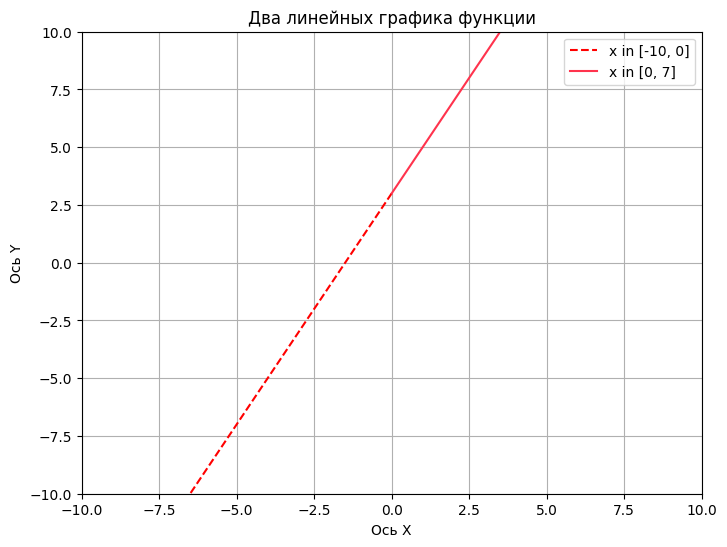

In [28]:
import matplotlib.pyplot as plt
import numpy as np
x1 = np.linspace(-10, 0, 100)
y1 = 2 * x1 + 3
x2 = np.linspace(0, 7, 100)
y2 = 2 * x2 + 3
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, 'r--', label='x in [-10, 0]')
plt.plot(x2, y2, color=(1.0, 0.2, 0.3), label='x in [0, 7]')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('Ось Х')
plt.ylabel('Ось Y')
plt.title('Два линейных графика функции')
plt.legend()
plt.grid(True)
plt.show()

Задача №2. Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).
*  По оси X - возраcт пассажира (Age)
*  По оси Y - стоимость билета (Fare)
*  Для выживших пассажиров используется маркер зеленый круг (Survived)
*  Для не выживших пассажиров используется маркер красный крест (Survived)
*  График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

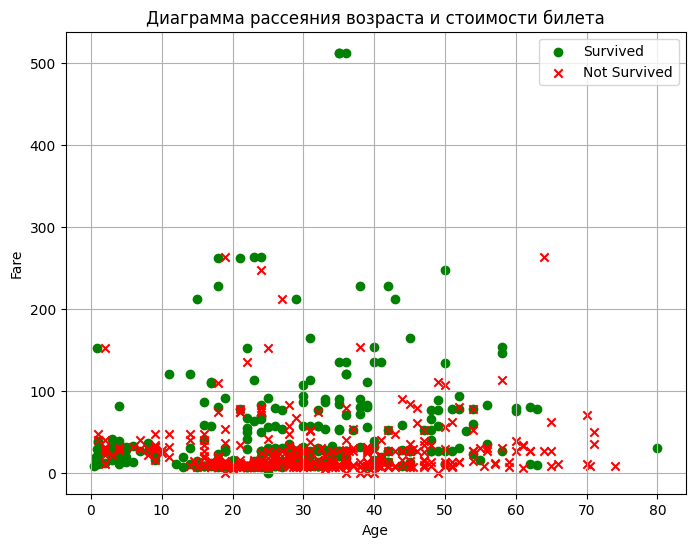

In [29]:
import pandas as pd
url = 'https://raw.githubusercontent.com/chebotarevsa/dap-2024/refs/heads/main/les05/data/titanic.csv'
df = pd.read_csv(url)
df_clean = df.dropna(subset=['Age', 'Fare'])
plt.figure(figsize=(8, 6))
survived = df_clean[df_clean['Survived'] == 1]
not_survived = df_clean[df_clean['Survived'] == 0]
plt.scatter(survived['Age'], survived['Fare'], c='green', label='Survived', marker='o')
plt.scatter(not_survived['Age'], not_survived['Fare'], c='red', label='Not Survived', marker='x')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Диаграмма рассеяния возраста и стоимости билета')
plt.legend()
plt.grid(True)
plt.show()

Задача №3. Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы. Для набора данных iris постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')
*  Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
*  Цвет маркеров должен зависеть от вида ирисов (iris.target)
*  Графики должны иметь подписи к осям, легенду и общий заголовок

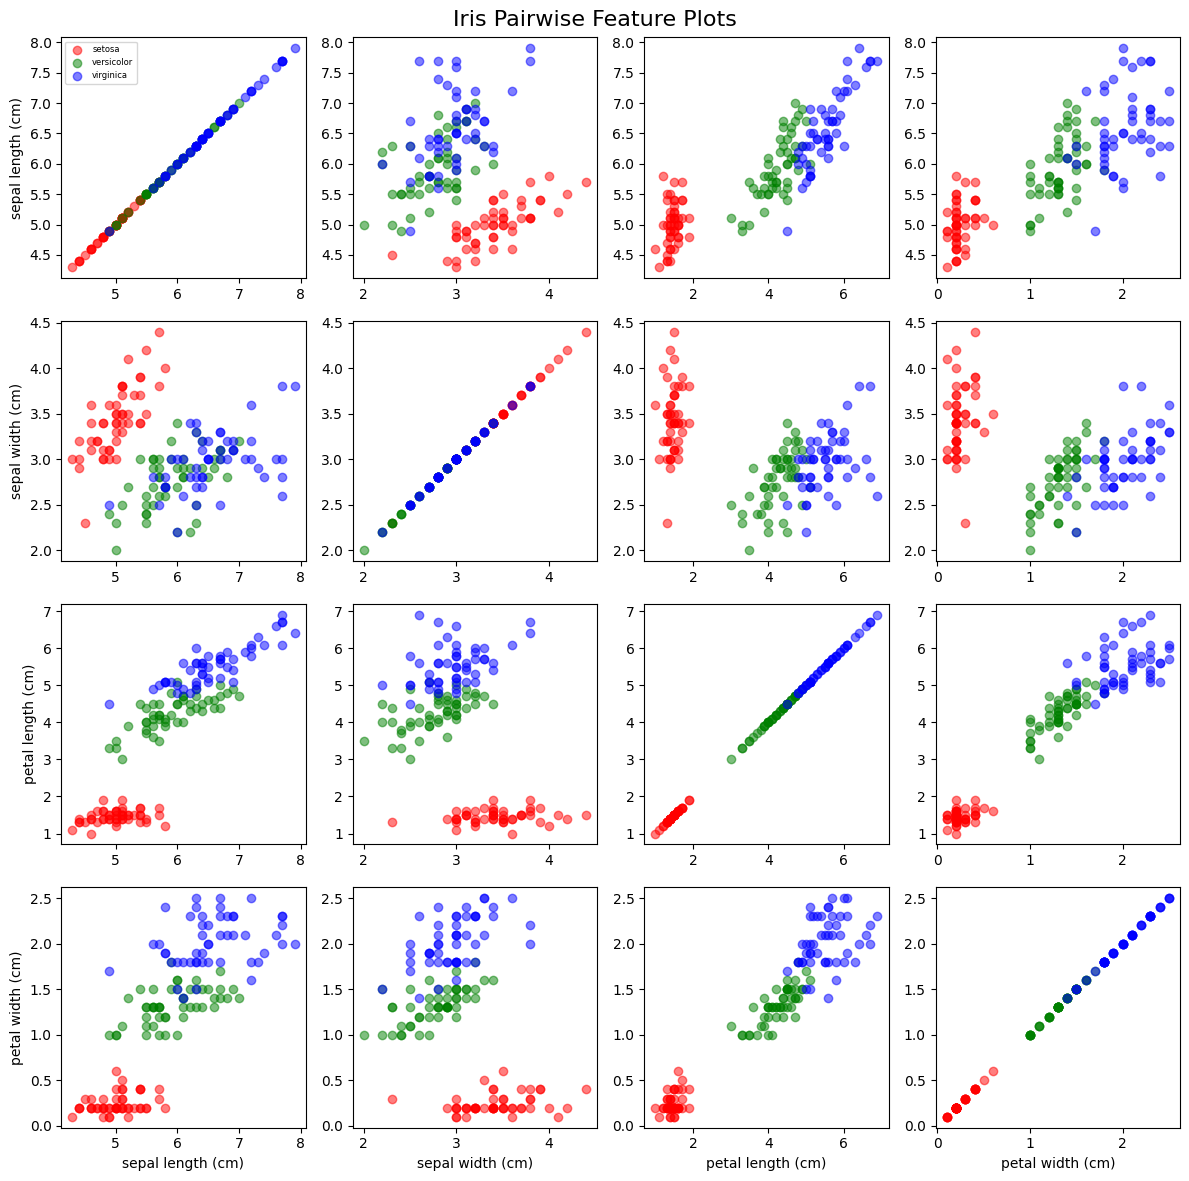

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
colors = ['red', 'green', 'blue']
plt.figure(figsize=(12, 12))
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        for t in range(3):
            plt.scatter(X[y == t, j], X[y == t, i], label=target_names[t], color=colors[t], alpha=0.5)
        if i == 3:
            plt.xlabel(feature_names[j])
        if j == 0:
            plt.ylabel(feature_names[i])
        if i == 0 and j == 0:
            plt.legend(loc='best', fontsize=6)
plt.suptitle('Iris Pairwise Feature Plots', fontsize=16)
plt.tight_layout()
plt.show()

Задача №4. Задача 4

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):
* Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
* Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
* График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

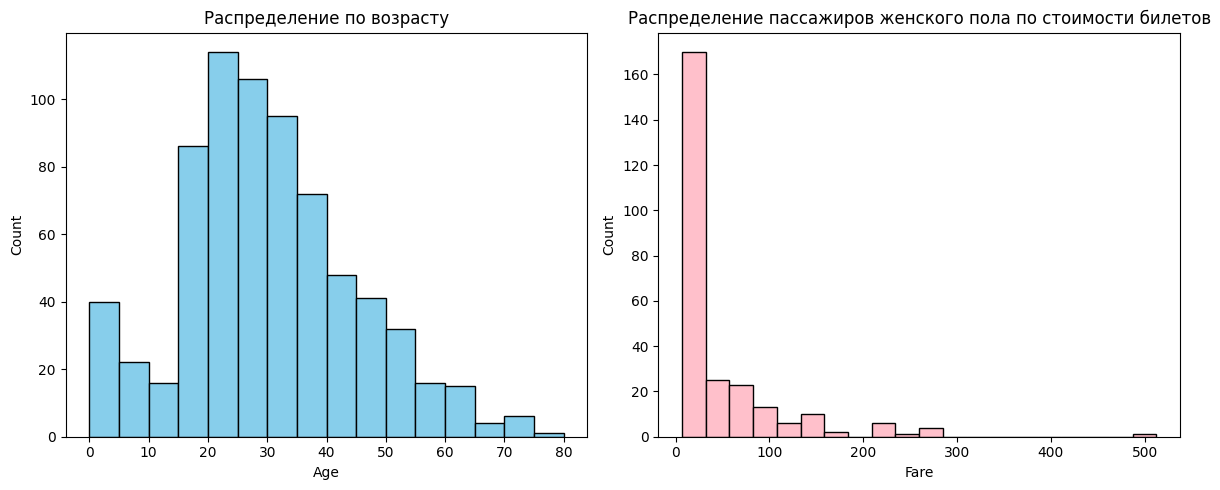

In [33]:
import numpy as np
import pandas as pd
url= 'https://raw.githubusercontent.com/chebotarevsa/dap-2024/refs/heads/main/les05/data/titanic.csv'
df = pd.read_csv(url)
df_clean = df.dropna(subset=['Age', 'Fare'])
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_clean['Age'], bins=range(0, 85, 5), color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Распределение по возрасту')
plt.subplot(1, 2, 2)
female_fare = df_clean[df_clean['Sex'] == 'female']['Fare']
plt.hist(female_fare, bins=20, color='pink', edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Распределение пассажиров женского пола по стоимости билетов')
plt.tight_layout()
plt.show()

Задача №5. Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:
* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - средняя стоимость за проезд для данного класса (Fare)
* График должен иметь подписи к осям, легенду и заголовок

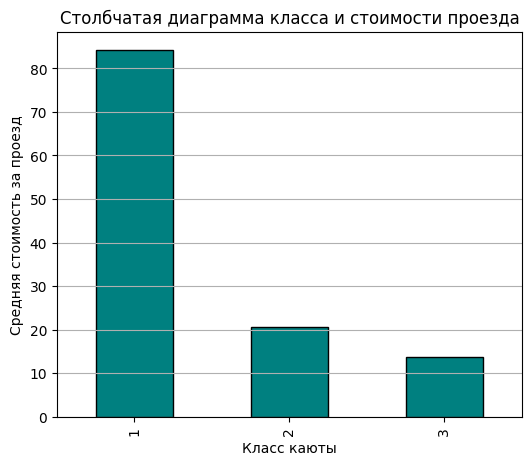

In [37]:
import numpy as np
import pandas as pd
url= 'https://raw.githubusercontent.com/chebotarevsa/dap-2024/refs/heads/main/les05/data/titanic.csv'
df = pd.read_csv(url)
mean_fare = df.groupby('Pclass')['Fare'].mean()
plt.figure(figsize=(6, 5))
mean_fare.plot(kind='bar', color='teal', edgecolor='black')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Столбчатая диаграмма класса и стоимости проезда')
plt.grid(axis='y')
plt.show()

Задача №6. Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:
* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - количество пассажиров с разбивкой по полу (Sex)
* График должен иметь подписи к осям, легенду и заголовок

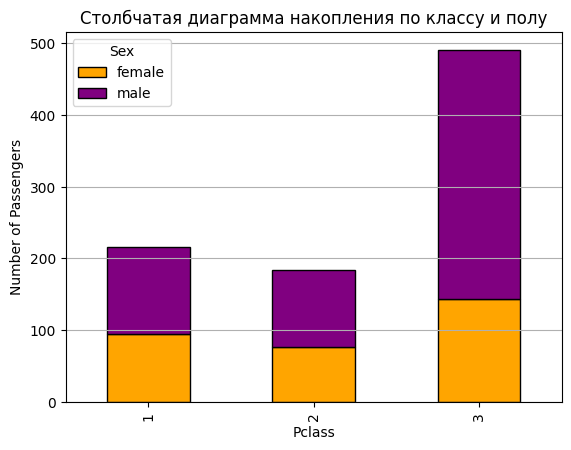

In [39]:
import numpy as np
import pandas as pd
url= 'https://raw.githubusercontent.com/chebotarevsa/dap-2024/refs/heads/main/les05/data/titanic.csv'
df = pd.read_csv(url)
pclass_sex = df.groupby(['Pclass', 'Sex']).size().unstack()
pclass_sex.plot(kind='bar', stacked=True, color=['orange', 'purple'], edgecolor='black')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.title('Столбчатая диаграмма накопления по классу и полу')
plt.legend(title='Sex')
plt.grid(axis='y')
plt.show()

Задача №7. Для набора данных iris постройте круговую диаграмму
* Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
* Сектор с максимальной долей долен быть выдвинут
* График должен иметь подписи к осям, легенду и заголовок

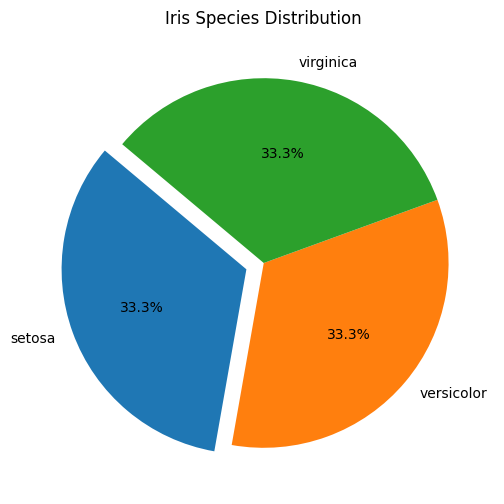

In [43]:
from sklearn.datasets import load_iris
iris = load_iris()
labels = iris.target_names
counts = np.bincount(iris.target)
explode = [0.1 if i == np.argmax(counts) else 0 for i in range(3)]
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Круговая диаграмма для iris')
plt.show()

Задача №8. Использую библиотеку Seaborn постройте гистограмму для возраста пассажиров "Титаника"

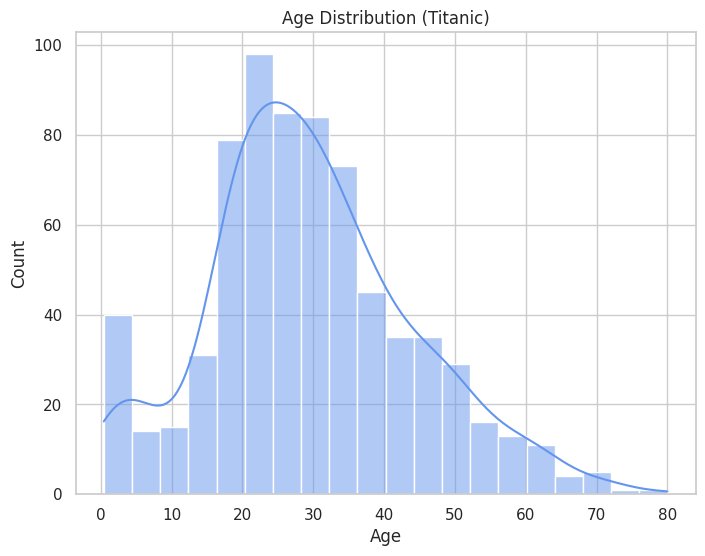

In [44]:
import numpy as np
import pandas as pd
url= 'https://raw.githubusercontent.com/chebotarevsa/dap-2024/refs/heads/main/les05/data/titanic.csv'
df = pd.read_csv(url)
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='cornflowerblue')
plt.title('Гистрограмма для возраста пассажиров')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()